In [199]:


import numpy as np
from pyqubo import Array, Placeholder, solve_qubo, Constraint


N = 8

variables = Array.create('q', N*N, 'BINARY')

mat = np.reshape(variables,(N,N))

In [200]:
column_constraint = 0
for row in range(N):
   column_constraint +=  (sum(v for v in mat[row, :]) - 1) ** 2

row_constraint = 0
for col in range(N):
   row_constraint +=  (sum(v for v in mat[:, col]) - 1) ** 2

diag_constraint = 0

for row in range(N):
    diag_constraint += sum (v for v in np.diag(mat, k=row))  * (sum(v for v in np.diag(mat, k=row)) - 1)
    if row != 0:
        diag_constraint += sum (v for v in np.diag(mat, k=-row))  * (sum (v for v in np.diag(mat, k=-row)) - 1)
    diag_constraint += sum (v for v in np.diag(np.fliplr(mat), k=row)) * ( sum (v for v in np.diag(np.fliplr(mat), k=row))  - 1)
    if row != 0:
        diag_constraint += sum (v for v in np.diag(np.fliplr(mat), k=-row)) * (sum (v for v in np.diag(np.fliplr(mat), k=-row)) - 1)

n_constraint = (sum(v for v in variables) - N) ** 2


alpha = Placeholder("alpha")
beta = Placeholder("beta")
gamma = Placeholder("gamma")
delta = Placeholder("delta")
eta = Placeholder("eta")
feed_dict = {'alpha': 3.0, 'beta': 3.0, 'gamma': 6.0, 'delta' : 5.0, 'eta': 1.0}


In [201]:
H = alpha * Constraint(column_constraint, 'column') + beta * Constraint(row_constraint, 'row')  + gamma * Constraint(diag_constraint, 'diag') + delta * Constraint(n_constraint, 'n')

model = H.compile()
qubo, offset = model.to_qubo(feed_dict=feed_dict)




In [202]:
solution = solve_qubo(qubo)
decoded_solution, broken, energy = model.decode_solution(solution, vartype="BINARY", feed_dict=feed_dict)

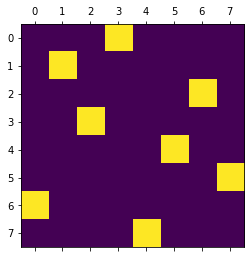

In [203]:
import matplotlib.pyplot as plt
image = np.zeros(N*N)

for row in range(N):
    for col in range(N):
        image[row *N + col] = decoded_solution['q'][row * N + col]
image = image.reshape((N, N))

plt.matshow(image)
plt.xticks(range(N))
plt.yticks(range(N))
plt.show()